In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import math, subprocess
import matplotlib.pyplot as plt

In [6]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Observación:
**Algunas instancias presentaron igual nombre lo que duplico los puntos graficados, pero en el informe se encuentran bien ilustradas.**

# Experimentos del TP de npm
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.


**uniforme-baja**: En esta instancia, los beneficios tienen los n´umeros del 1, . . ,n en alg´un
orden aleatorio, y los contagios los n´umeros entre el intervalo [ log2(M)/2: log2(M)].

**uniforme-alta**: En esta instancia, los beneficios tienen los números del 1, . . ,n en algún
orden aleatorio, y los contagios es siempre el número M/2.

**uniforme-alta-modif**: En esta instancia, los beneficios tienen los números del 10, . . ,n *
10 en algún orden aleatorio, y los contagios es siempre el n´umero M/2, y el primer elemento
en el arreglo de beneficios es igual a la suma de todos los beneficios mas uno.

**mejor-caso-bt**: En esta instancia, el dataset tiene todas las posiciones del arreglo de contagios igual a M, y el arreglo de beneficios igual a 1. La primer posición del arreglo de beneficios es la sumatoria de beneficios por local.

**peor-caso-bt**: En esta instancia, el dataset tiene todas las posiciones del arreglo de contagios
igual a 0, y el arreglo de beneficios igual a 1.

**programación-dinamica**: En esta instancia, se contruyen datasets en donde la cantidad
de locales y contagio maximo permitido varian entre [1000, 7000].

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-B**: Backtracking solamente con poda por optimalidad.
- **DP**: Programación dinámica.

# Experimentos
Leemos el dataframe con todos los resultados.

In [7]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados


,dataset,n,R,metodo,tiempo
0,optimalidad-prom,1,2,BT,0.001035
1,optimalidad-prom,2,4,BT,0.001253
2,optimalidad-prom,3,6,BT,0.001370
3,optimalidad-prom,4,8,BT,0.001258
4,optimalidad-prom,5,10,BT,0.001672
...,...,...,...,...,...
795,factibilidad-prom,196,392,BT-F,9918.980000
796,factibilidad-prom,197,394,BT-F,10304.400000
797,factibilidad-prom,198,396,BT-F,10505.600000
798,factibilidad-prom,199,398,BT-F,10693.100000


## Experimento 1: Complejidad de Fuerza Bruta
En este experimento evaluamos el método FB con los datasets densidad-alta y densidad-baja. La hipótesis es que siempre va a tener un comportamiento exponencial porque tiene peor y mejor caso iguales.

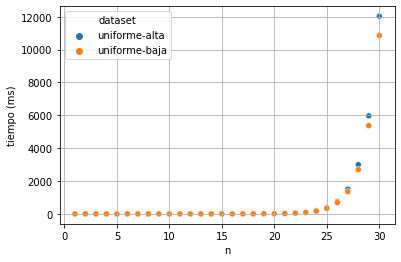

In [30]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');
fig.grid();
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/fbuniforme.svg");

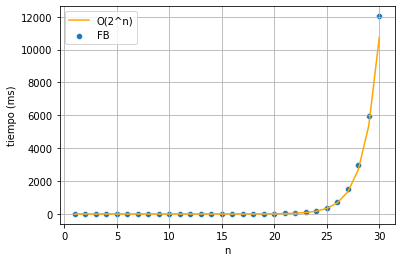

In [31]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="uniforme-alta")].copy();
df_complejidad_FB["tiempo_esperado"] = (2.0 ** df_complejidad_FB["n"]) * 0.000010; # 0.000015Exponencial
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="orange");
fig.grid();
fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fbcomplejidad.svg")

Índice de correlación de Pearson: 0.9999946363162978


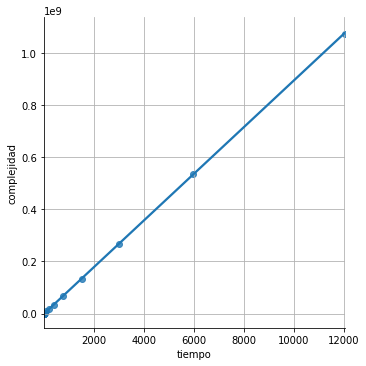

In [32]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="uniforme-alta")].copy();
df_complejidad_FB["complejidad"] = (2.0 ** df_complejidad_FB["n"]);
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.grid()
plt.savefig("graficos/fbcorrelacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

## Experimento 2: Análisis de las podas 
Analizar Backtracking con y sin las podas para diferentes instancias con dataset-optimalidad y dataset-optimalidad.

In [8]:
df_resultados

,dataset,n,R,metodo,tiempo
0,optimalidad-prom,1,2,BT,0.001035
1,optimalidad-prom,2,4,BT,0.001253
2,optimalidad-prom,3,6,BT,0.001370
3,optimalidad-prom,4,8,BT,0.001258
4,optimalidad-prom,5,10,BT,0.001672
...,...,...,...,...,...
795,factibilidad-prom,196,392,BT-F,9918.980000
796,factibilidad-prom,197,394,BT-F,10304.400000
797,factibilidad-prom,198,396,BT-F,10505.600000
798,factibilidad-prom,199,398,BT-F,10693.100000


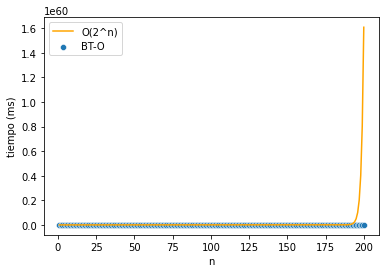

In [175]:
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_BT_peor_caso["tiempo_esperado"] = df_BT_peor_caso["n"]; # Exponencial.
fig = sns.scatterplot(data=df_BT_peor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-peor-caso.svg");

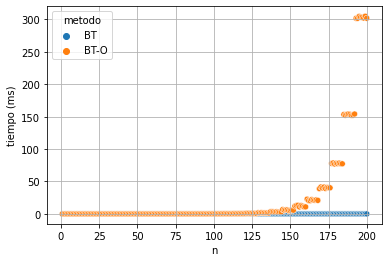

In [190]:
df_BT_uniforme_alta = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "optimalidad-prom")].copy();

fig = sns.scatterplot(data=df_BT_uniforme_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.grid()
plt.savefig("graficos/btpodasiguales.svg");

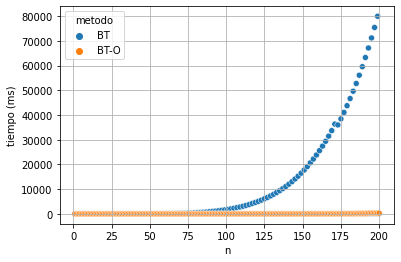

In [213]:
df_BT = df_resultados[(df_resultados["metodo"]=="BT-O") | (df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "factibilidad-prom")].copy();
fig = sns.scatterplot(data=df_BT, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.grid()
#plt.savefig("graficos/btpodasiguales.svg");

In [ ]:
df_BT_uniforme_baja = df_resultados[((df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "uniforme-baja")].copy();
df_BT_uniforme_baja.to_csv('out.csv', index=False)
df_BT_uniforme_baja
#df_BT_uniforme_baja = df_BT_uniforme_baja[df_BT_uniforme_baja["tiempo"] < 2000]; # Sacamos outliers.


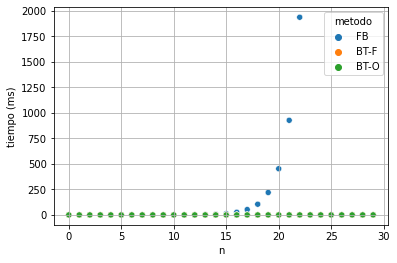

In [14]:
# Se utilizo el grafico de abajo, porque es una lupa de este.

df_BT_uniforme_alta = df_resultados[((df_resultados["metodo"]=="BT-F") |(df_resultados["metodo"]=="BT") |(df_resultados["metodo"]=="BT-O") | (df_resultados["metodo"]=="FB")) & (df_resultados["dataset"] == "uniforme-alta")].copy();
#df_BT_uniforme_alta = df_resultados[df_resultados["dataset"] == "uniforme-alta"].copy();
df_BT_uniforme_alta = df_BT_uniforme_alta[df_BT_uniforme_alta["tiempo"] < 2000]; # Sacamos outliers.
df_BT_uniforme_alta = df_BT_uniforme_alta[df_BT_uniforme_alta["n"] < 30];
fig = sns.scatterplot(data=df_BT_uniforme_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.grid()
#plt.savefig("graficos/btvsFB.svg");

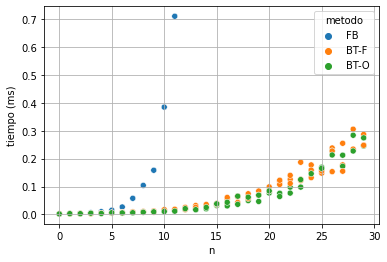

In [15]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_uniforme_alta[df_BT_uniforme_alta["tiempo"]<1], x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.grid()
plt.savefig("graficos/btpodasfblupa.svg");

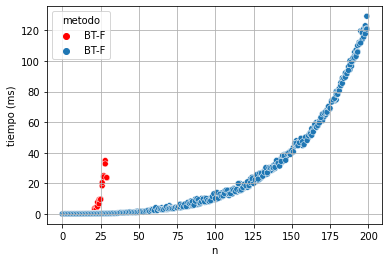

In [10]:
df_densidad_baja = df_resultados[((df_resultados["metodo"]=="BT-F")) & (df_resultados["dataset"] == "uniforme-baja")].copy();
df_densidad_baja = df_densidad_baja[df_densidad_baja["n"]<=30];
df_densidad_alta = df_resultados[((df_resultados["metodo"]=="BT-F")) & (df_resultados["dataset"] == "uniforme-alta")].copy();
fig = sns.scatterplot(data=df_densidad_baja, x='n', y='tiempo', hue='metodo', palette=["red"]);
fig = sns.scatterplot(data=df_densidad_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.grid()
#plt.savefig("graficos/comparacion-bt-dp-baja.svg");

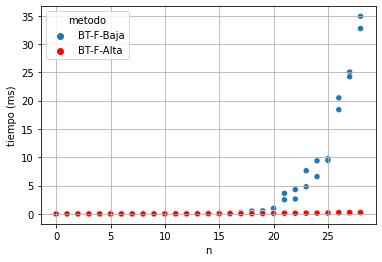

In [20]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
df_densidad_alta["metodo"].replace({"BT-F": "BT-F-Alta"}, inplace=True)

df_densidad_baja["metodo"].replace({"BT-F": "BT-F-Baja"}, inplace=True)
fig = sns.scatterplot(data=df_densidad_baja[df_densidad_baja["n"]<=28], x='n', y='tiempo', hue='metodo');

fig = sns.scatterplot(data=df_densidad_alta[df_densidad_alta["n"]<=28], x='n', y='tiempo', hue='metodo', palette=["red"]);

fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.grid()
#plt.savefig("graficos/comp-zoom-altabaja.svg");

## Experimento 2Bis: Complejidad de Backtracking (De aca abajo no vimos)
En este experimento evaluamos el método BT con los datasets mejor-caso-bt y peor-caso-bt. La hipótesis es que va a tener un comportamiento exponencial en el peor caso y lineal en el mejor caso.

In [7]:
df_resultados

,dataset,n,M,metodo,tiempo
0,uniforme-alta,0,1,FB,0.001920
1,uniforme-alta,1,2,FB,0.003307
2,uniforme-alta,2,2,FB,0.003860
3,uniforme-alta,3,3,FB,0.006177
4,uniforme-alta,4,3,FB,0.009875
...,...,...,...,...,...
1991,dinamica,7500,5500,DP,1995.200000
1992,dinamica,7500,6000,DP,2020.940000
1993,dinamica,7500,6500,DP,2036.410000
1994,dinamica,7500,7000,DP,2036.770000


In [ ]:
#VER ..

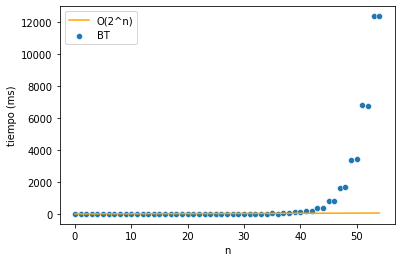

In [11]:
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_BT_peor_caso["tiempo_esperado"] = df_BT_peor_caso["n"]; # Exponencial.
fig = sns.scatterplot(data=df_BT_peor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-peor-caso.svg");

Índice de correlación de Pearson: 0.8951201692128035


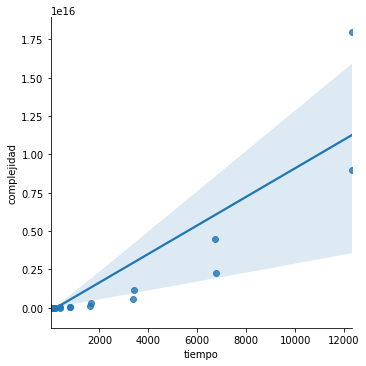

In [12]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_BT_peor_caso["complejidad"] = 2.0 ** (df_BT_peor_caso["n"]);
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
#plt.savefig("graficos/bt-correlacion-peor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

### Graficos de Las ultimas podas (Exp 4 Bis)

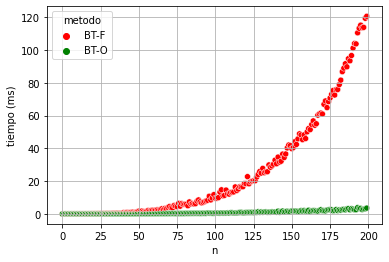

In [12]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
#df_uniforme_modif["metodo"].replace({"BT-F": "BT-F-Alta"}, inplace=True)

#df_uniforme_modif["metodo"].replace({"BT-F": "BT-F-Baja"}, inplace=True)
df_uniforme_modif = df_resultados[((df_resultados["metodo"]=="BT-F")| (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "uniforme-alta-modif")].copy();

#fig = sns.scatterplot(data=df_uniforme_modif, x='n', y='tiempo', hue='metodo');

fig = sns.scatterplot(data=df_uniforme_modif, x='n', y='tiempo', hue='metodo', palette=["red","Green"]);

fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.grid()
#plt.savefig("graficos/comp-podas.svg");

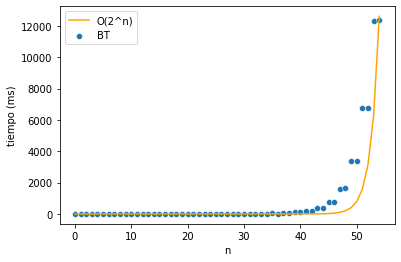

In [8]:
#GRAFICO DE 2^N vs BT
df_complejidad_BT_peor = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_complejidad_BT_peor["tiempo_esperado"] = 2.0**df_complejidad_BT_peor["n"]* 0.0000000000007; # Exponencial.
fig = sns.scatterplot(data=df_complejidad_BT_peor, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_BT_peor, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-peor-caso.svg"); #xd

Índice de correlación de Pearson: 0.8951201692128035


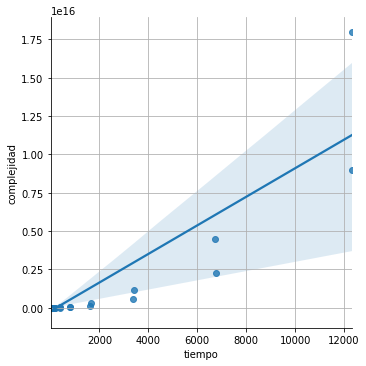

In [9]:
# Pearson Experimento BT
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_BT_peor = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"]=="peor-caso-bt")].copy();
df_complejidad_BT_peor["complejidad"] = (2.0**df_complejidad_BT_peor["n"]);
fig = sns.lmplot(data=df_complejidad_BT_peor, x="tiempo", y="complejidad");
plt.grid()
#plt.savefig("graficos/peorcasoBTcorrelacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_BT_peor, "tiempo", "complejidad"));

# Experimento 4: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

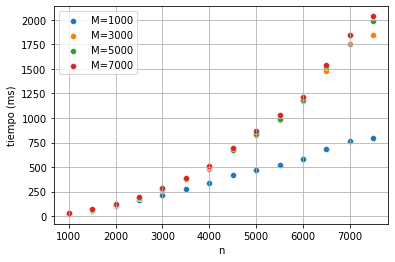

In [21]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==7000], x='n', y='tiempo');
fig.legend(labels=['M=1000','M=3000','M=5000','M=7000']);
fig.grid()
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/dp-n.svg");

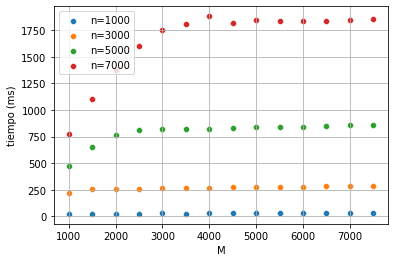

In [22]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='M', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='M', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='M', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='M', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.grid()
fig.set(xlabel='M', ylabel='tiempo (ms)');
#plt.savefig("graficos/dp-M.svg");

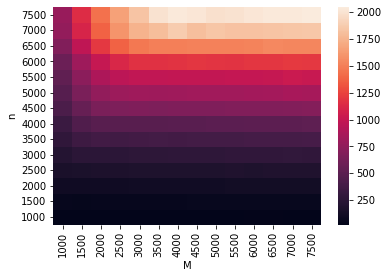

In [23]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='M', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
#plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.7694848457969441


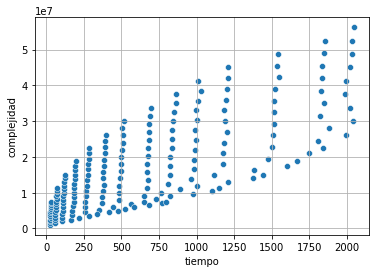

In [24]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["complejidad"] =  df_dinamica["n"]*df_dinamica["M"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
fig.grid()
#plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

## Experimento comparacion : DP vs BT

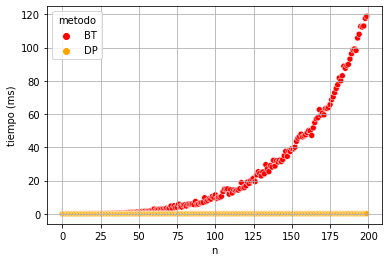

In [46]:
df_BT_uniforme_alta = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "uniforme-alta")].copy();

df_DP_uniforme_alta = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"] == "uniforme-alta")].copy();

df_BT_uniforme_alta = df_BT_uniforme_alta[df_BT_uniforme_alta["n"] <= 200];
df_DP_uniforme_alta = df_DP_uniforme_alta[df_DP_uniforme_alta["n"] <= 200];

fig = sns.scatterplot(data=df_BT_uniforme_alta, x='n', y='tiempo', hue='metodo', palette=["red"]);
fig = sns.scatterplot(data=df_DP_uniforme_alta, x='n', y='tiempo', hue='metodo', palette=["orange"]);
fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.grid()
plt.savefig("graficos/DPvsBT1.svg");

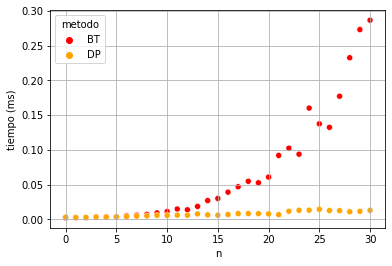

In [47]:
#df_densidad_alta["metodo"].replace({"BT-F": "BT-F-Alta"}, inplace=True)

#df_densidad_baja["metodo"].replace({"BT-F": "BT-F-Baja"}, inplace=True)
df_BT_uniforme_alta = df_BT_uniforme_alta[df_BT_uniforme_alta["n"] <= 30];
df_DP_uniforme_alta = df_DP_uniforme_alta[df_DP_uniforme_alta["n"] <= 30];
fig = sns.scatterplot(data=df_BT_uniforme_alta, x='n', y='tiempo', hue='metodo', palette=["red"]);
fig = sns.scatterplot(data=df_DP_uniforme_alta, x='n', y='tiempo', hue='metodo', palette=["orange"]);

fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.grid()


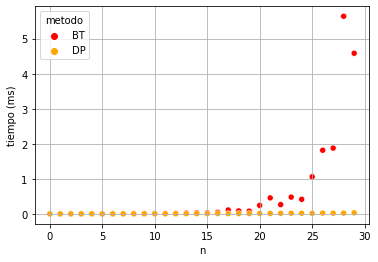

In [49]:
df_BT_uniforme_baja = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "uniforme-baja")].copy();

df_DP_uniforme_baja = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"] == "uniforme-baja")].copy();

df_BT_uniforme_baja = df_BT_uniforme_baja[df_BT_uniforme_baja["n"] <= 31];
df_DP_uniforme_baja = df_DP_uniforme_baja[df_DP_uniforme_baja["n"] <= 31];

fig = sns.scatterplot(data=df_BT_uniforme_baja, x='n', y='tiempo', hue='metodo', palette=["red"]);
fig = sns.scatterplot(data=df_DP_uniforme_baja, x='n', y='tiempo', hue='metodo', palette=["orange"]);
fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.grid()
plt.savefig("graficos/DPvsBT2.svg");